In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
import warnings
import sys
warnings.filterwarnings("ignore")

import glob
from pathlib import Path

sns.set_palette("husl")

In [2]:
DATA_ROOT = Path('./data') # set your data folder here
! ls {DATA_ROOT}

abnormal_test normal_test   record.py     train


In [3]:
pwd

'/Users/katouyuuya/dive/udemy/tile'

# 正常音と異常音をきいてみる

In [13]:
import IPython
import librosa.display

path = './data/normal_test/'
normal_files = ['20200629_230555.wav', '20200629_230552.wav']

# 正常音
for i in normal_files:
    fname =  path + i # Hi-hat
    y, sr = librosa.load(fname)
IPython.display.Audio(data=y, rate=sr)

In [14]:
path2 = './data/abnormal_test/'
anormal_files = ['20200629_230639.wav', '20200629_230643.wav']

# 異常音
for i in anormal_files:
    fname =  path2 + i # Hi-hat
    y, sr = librosa.load(fname)
IPython.display.Audio(data=y, rate=sr)

# 波形データをみる

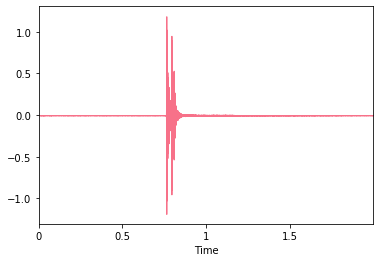

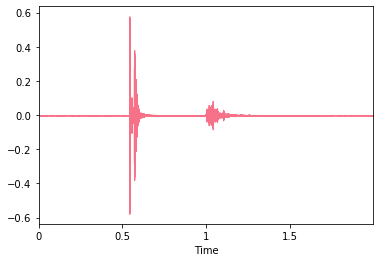

In [15]:
# 通常音
for i in normal_files:
    fname =  path + i # Hi-hat
    y, sr = librosa.load(fname)

    librosa.display.waveplot(y, sr=sr)
    plt.show();

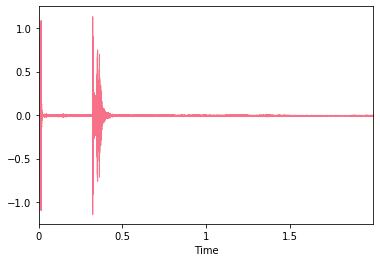

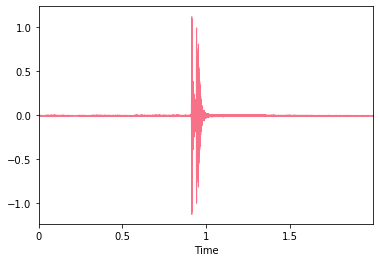

In [16]:
# 異常音
for i in anormal_files:
    fname =  path2 + i # Hi-hat
    y, sr = librosa.load(fname)

    librosa.display.waveplot(y, sr=sr)
    plt.show();

正常、異常で振幅に違いがあるが、外の雑音などの環境音が影響かもしれない

# スペクトログラム化（短時間フーリエ変換）したデータを眺める

(1025, 87)


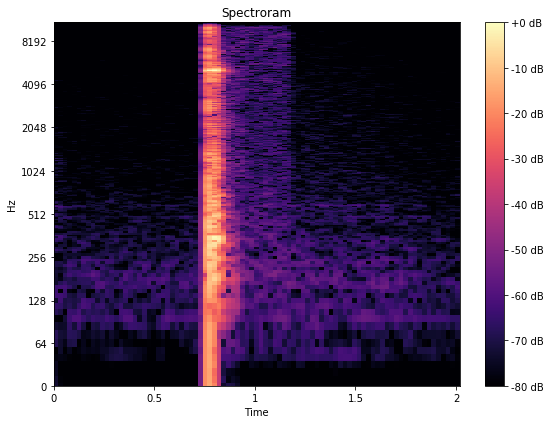

(1025, 87)


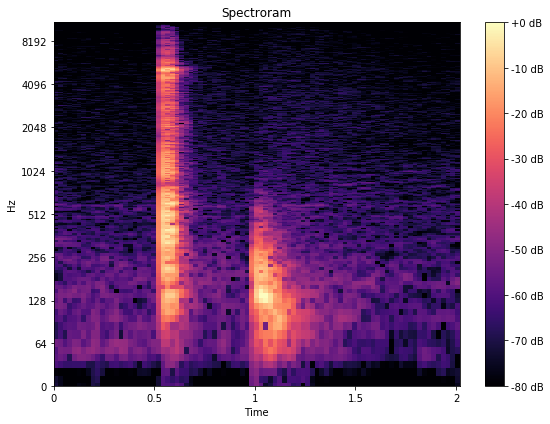

In [17]:
# 正常音
for i in normal_files:
    fname =  path + i # Hi-hat
    y, sr = librosa.load(fname)
    D = np.abs(librosa.stft(y))
    log_D = librosa.amplitude_to_db(D, ref=np.max)
    print(log_D.shape)
    plt.figure(figsize=(8,6))
    librosa.display.specshow(log_D, x_axis='time', y_axis='log')

    plt.title('Spectroram') #タイトル
    plt.colorbar(format='%+02.0f dB') #カラーバー表示
    plt.tight_layout() #コンパクトに表示
    plt.show() #表示を出力

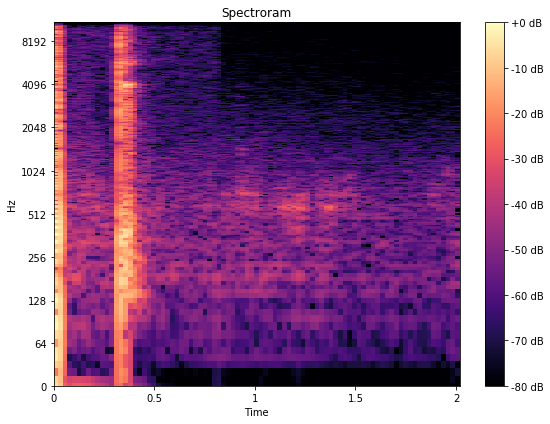

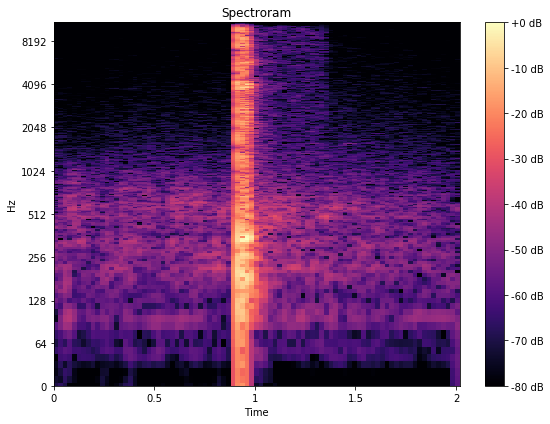

In [18]:
# 異常音
for i in anormal_files:
    fname =  path2 + i # Hi-hat
    y, sr = librosa.load(fname)
    D = np.abs(librosa.stft(y))
    log_D = librosa.amplitude_to_db(D, ref=np.max)

    plt.figure(figsize=(8,6))
    librosa.display.specshow(log_D, x_axis='time', y_axis='log')

    plt.title('Spectroram') #タイトル
    plt.colorbar(format='%+02.0f dB') #カラーバー表示
    plt.tight_layout() #コンパクトに表示
    plt.show() #表示を出力


(128, 87)


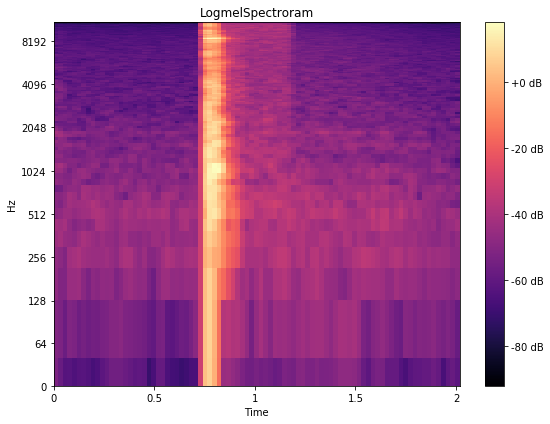

(128, 87)


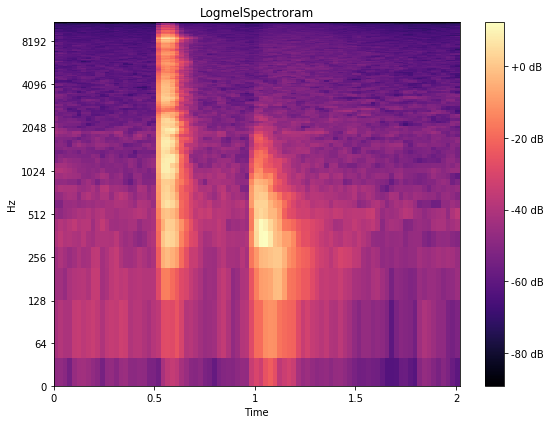

(128, 87)


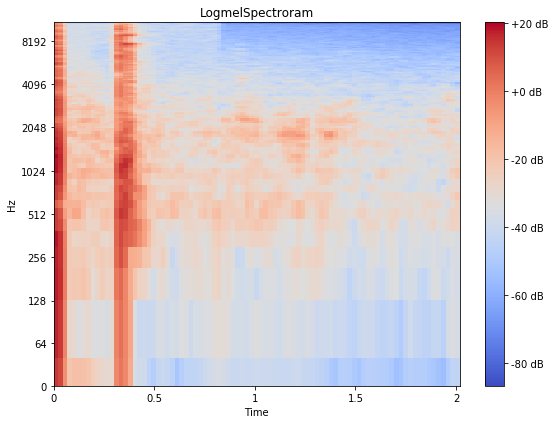

(128, 87)


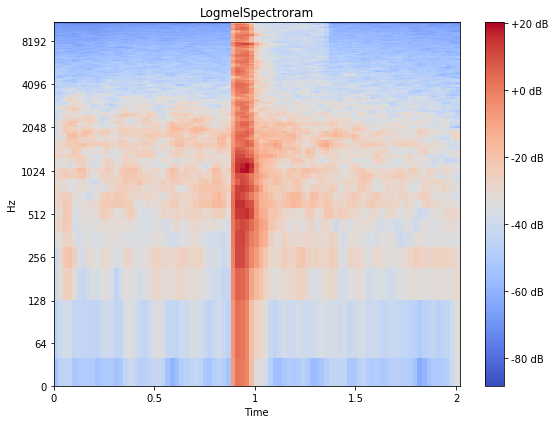

In [19]:
# 正常音
for i in normal_files:
    fname =  path + i # Hi-hat
    y, sr = librosa.load(fname)
    D = librosa.feature.melspectrogram(y=y, sr=sr,hop_length=512 )
    D = 20.0 / 2.0 * np.log10(D + sys.float_info.epsilon)
#     D = np.abs(librosa.stft(y))
#     log_D = librosa.amplitude_to_db(D, ref=np.max)
    print(D.shape)
    plt.figure(figsize=(8,6))
    librosa.display.specshow(D, x_axis='time', y_axis='log')

    plt.title('LogmelSpectroram') #タイトル
    plt.colorbar(format='%+02.0f dB') #カラーバー表示
    plt.tight_layout() #コンパクトに表示
    plt.show() #表示を出力

# 異常音
for i in anormal_files:
    fname =  path2 + i # Hi-hat
    y, sr = librosa.load(fname)
    D = librosa.feature.melspectrogram(y=y, sr=sr,hop_length=512 )
    D = 20.0 / 2.0 * np.log10(D + sys.float_info.epsilon)
#     D = np.abs(librosa.stft(y))
#     log_D = librosa.amplitude_to_db(D, ref=np.max)
    print(D.shape)
    plt.figure(figsize=(8,6))
    librosa.display.specshow(D, x_axis='time', y_axis='log')

    plt.title('LogmelSpectroram') #タイトル
    plt.colorbar(format='%+02.0f dB') #カラーバー表示
    plt.tight_layout() #コンパクトに表示
    plt.show() #表示を出力

# MFCC

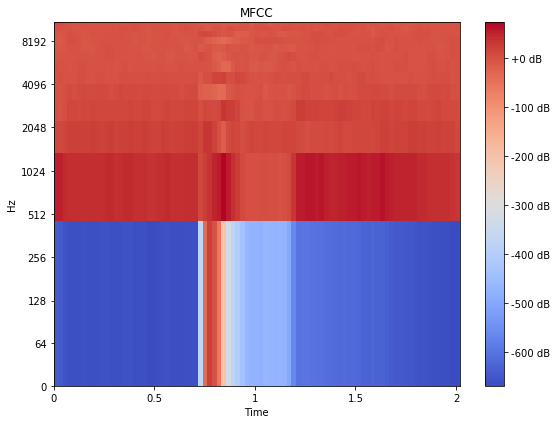

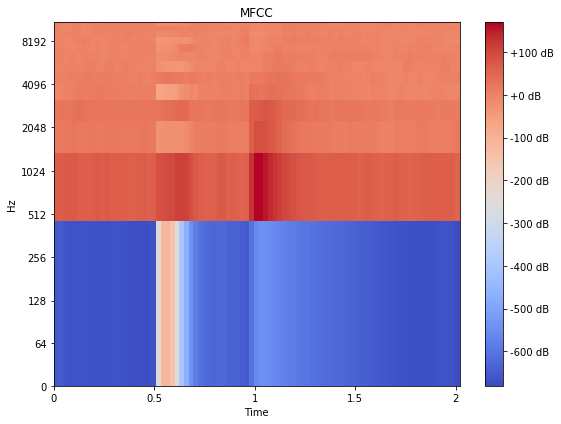

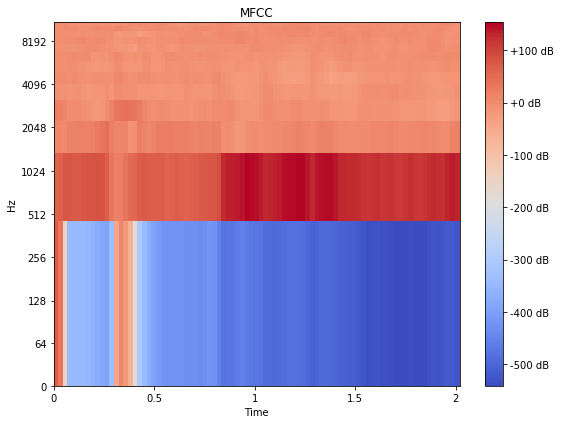

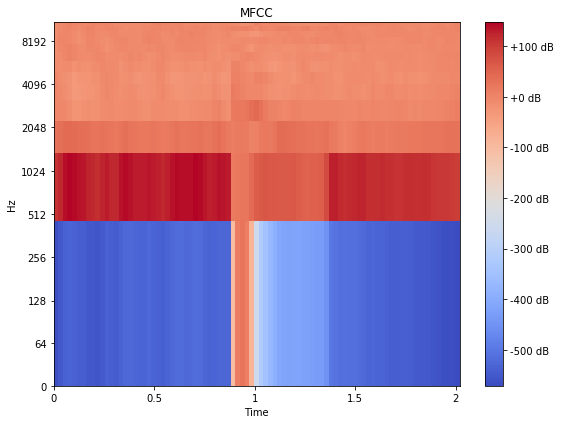

In [20]:
# 正常音
for i in normal_files:
    fname =  path + i # Hi-hat
    y, sr = librosa.load(fname)
    D = librosa.feature.mfcc(y=y, sr=sr,n_mfcc=13, hop_length=512 )
#     D = np.abs(librosa.stft(y))
#     log_D = librosa.amplitude_to_db(D, ref=np.max)

    plt.figure(figsize=(8,6))
    librosa.display.specshow(D, x_axis='time', y_axis='log')

    plt.title('MFCC') #タイトル
    plt.colorbar(format='%+02.0f dB') #カラーバー表示
    plt.tight_layout() #コンパクトに表示
    plt.show() #表示を出力
    
    # 正常音
for i in anormal_files:
    fname =  path2 + i # Hi-hat
    y, sr = librosa.load(fname)
    D = librosa.feature.mfcc(y=y, sr=sr,n_mfcc=13, hop_length=512 )
#     D = np.abs(librosa.stft(y))
#     log_D = librosa.amplitude_to_db(D, ref=np.max)

    plt.figure(figsize=(8,6))
    librosa.display.specshow(D, x_axis='time', y_axis='log')

    plt.title('MFCC') #タイトル
    plt.colorbar(format='%+02.0f dB') #カラーバー表示
    plt.tight_layout() #コンパクトに表示
    plt.show() #表示を出力